In [42]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, fcluster
from collections import defaultdict
from pprint import pprint

%matplotlib inline

Read in the auto generated index for the compilers course.

In [3]:
DATA_DIR = '../../data/'
index = set()
with open(DATA_DIR + 'auto_index.txt') as f:
    for line in f:
        index.add(line.strip())

Read in pretrained word vectors. These are too big to fit in the repo, they should be downloaded from http://nlp.stanford.edu/data/glove.6B.zip and put in the data directory. At a first glance, these seem to work better.

In [66]:
vectors = {}
with open(DATA_DIR + 'glove.6B/glove.6B.300d.txt') as f:
    for line in f:
        splits = line.strip().split()
        word = splits[0]
        vector = np.array([float(n) for n in splits[1:]])
        vectors[word] = vector

Vectors trained on closed caption files.

In [56]:
vectors = {}
with open(DATA_DIR + 'vectors.txt') as f:
    for line in f:
        splits = line.strip().split()
        word = splits[0]
        vector = np.array([float(n) for n in splits[1:]])
        vectors[word.lower()] = vector

Get phrase vectors by summing word vectors.

In [67]:
def get_phrase_vector(phrase):
    words = phrase.split()
    result = np.zeros(len(vectors.values()[0]))
    for word in words:
        if word not in vectors:
            print('Could not find {}'.format(word))
        else:
            result += vectors[word]
    return result

Cluster the words.

In [68]:
X = [get_phrase_vector(phrase) for phrase in index]
Z = linkage(X, method='ward', metric='euclidean')

Could not find paren
Could not find paren


Plot the cost of merging two clusters vs. the merge number (should be monotonically increasing).

[  3.69356758   4.13741405   4.44489738   4.46262188   4.61398124
   4.66001545   4.70961152   4.71745656   4.88577889   4.96808557
   5.08694083   5.09850512   5.10807673   5.11446487   5.18683788
   5.27276177   5.29587697   5.36857321   5.38897728   5.39155261
   5.42246743   5.46708066   5.48488546   5.50349785   5.56128428
   5.57576189   5.63028636   5.65851842   5.66640907   5.6860493
   5.73137719   5.76292044   5.76505134   5.77297142   5.79029102
   5.79649718   5.81225915   5.83461695   5.88446536   5.8976468
   5.91013186   5.92771613   5.93216154   5.93805003   5.95750167
   5.96244749   5.98305975   6.06067313   6.06274785   6.0836159
   6.13624388   6.14123603   6.14204644   6.14639504   6.14878453
   6.16090322   6.17559959   6.19277768   6.2556115    6.2732039
   6.28488026   6.30919955   6.34229186   6.37917575   6.43203066
   6.44883839   6.46454432   6.47014073   6.48722105   6.48787206
   6.50343219   6.50392261   6.56281903   6.57026035   6.573012
   6.65871057   

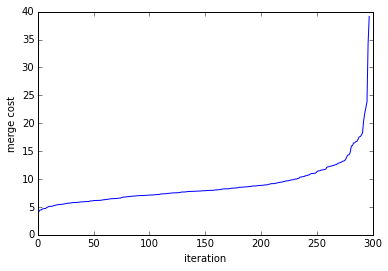

In [69]:
print(Z[:, 2])
plt.plot(Z[:, 2])
plt.xlabel('iteration')
_ = plt.ylabel('merge cost')

Recover the clusters, stopping merging at some distance.

In [70]:
cluster_idxs = fcluster(Z, 10.0, criterion='distance')

In [71]:
clusters = defaultdict(set)
for phrase, cluster_idx in zip(index, cluster_idxs):
    clusters[cluster_idx].add(phrase)
pprint(clusters.values())

[set(['leftmost', 'rightmost']),
 set(['dfa', 'nfa', 'parser']),
 set(['algorithm', 'compute', 'deterministic', 'optimization']),
 set(['byte', 'integer']),
 set(['alphabet',
      'derivation',
      'nested',
      'notation',
      'parameter',
      'predicate',
      'semantics',
      'subclass',
      'subset',
      'template']),
 set(['accumulator',
      'increment',
      'initialization',
      'nonterminal',
      'parens',
      'subtraction']),
 set(['identifier', 'subtype']),
 set(['factorial']),
 set(['reachable object']),
 set(['viable prefix']),
 set(['cache', 'instruction', 'optional', 'typed', 'typing']),
 set(['keyword']),
 set(['boundary',
      'cycle',
      'digit',
      'domain',
      'loop',
      'operator',
      'sequence',
      'thread']),
 set(['coloring', 'dot', 'heap', 'node', 'root', 'unreachable']),
 set(['architecture',
      'configuration',
      'design',
      'interface',
      'layout',
      'programmer']),
 set(['beta', 'epsilon']),
 set